<a id='contents'></a>
# Sustainable Development Goal Profiles
This notebook provides the code to generate the tables for the 17 Sustainable Development Goal profiles on global researcher attitudes to societal impact of research.

If you are running the notebook (rather than viewing the static version) the '<a href='#setup'>Setup</a>' cell must be run first, as it loads all necessary libraries and defines the data tables for the SDGs. The '<a href='#SDG'>SDG</a>' cell should then be run once you have stated which of the 17SDGs you want to generate the tables for. 

After these cells have been run, the tables/graphs may be generated individually by running the appropriate code. All the cells should be run, however, before trying to <a href='#export'>Export</a> the data 
## Contents
<a href='#setup'>Setup</a><br/>
<a href='#SDG'>SDG</a><br/>
### Importance of Impact
<a href='#q3_2'>Q3.2 For your most recent publication, how important to you are each of the following?</a><br/>
<a href='#q5_7'>Q5.7 To what extent do you agree or disagree with the following: “The funding of research should be more strongly linked to demonstrable societal impact”</a><br/>
<a href='#q4_3'>Q4.3 For your most recent publication, which of the following did you do before carrying out the research?</a><br/>

### Audience
<a href='#q3_6'>Q3.6 Which of the following types of impact do you hope that your most recent publication will have?</a><br/>
<a href='#q3_7'>Q3.7 Which of the following audiences were you trying to reach with your most recent publication?</a><br/>
### Channels of Communication
<a href='#q3_4'>Q3.4 Thinking now about the journal with which you published your most recent article. To what extent was your choice of journal influenced by your intended societal impact for the research?</a><br/>
<a href='#q3_5'>Q3.5 What aspects of this journal did you think made it appropriate to the potential societal impact of your research?</a><br/>
<a href='#q4_1'>Q4.1 For your most recent publication, which of the following have you done (or do you plan to do) to increase the societal impact of the research - as opposed to increasing awareness with your peers?<br/>
Q4.2 Of these activities, which one do you believe is likely to have the greatest effect on increasing the societal impact of the research?</a><br/>
[NB. Q4.1 and Q4.2 are combined in one graph]<br/>

### Measuring Impact
<a href='#q5_1'>Q5.1 To what extent do you attempt to track the societal impact of your published research?</a><br/>
<a href='#q5_4'>Q5.4 To what extent do you agree or disagree with the following: “Measuring the societal impact of my research is something I feel I should do more of”</a><br/>
<a href='#q49'>Q49 Which one method do you think is the best for tracking the societal impact of your research?</a><br/>
<a href='#q5_5'>Q5.5 What are the challenges with regards to tracking the societal impact of your research?</a><br/>

### Export Data
<a href='#export'>Export</a><br/>

<a id='setup'></a>
# Setup
<a href='#contents'>Return to Contents</a><br/>

In [18]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(openxlsx)
library(janitor)
library(scales)
springerdf<- openxlsx::read.xlsx("https://zenodo.org/record/3956548/files/ANON%20RAWDATA%20Research%2BArticle%2BImpact_20200217.xlsx")
springerdf<-clean_names(springerdf)

#Function
summariseCol <- function(dfName, columnName, typeName) {
    groupedSet<-group_by(get(dfName), get(columnName))
    summarySet<-summarise(groupedSet, count = n())
    summarySet<-rename(summarySet, "q"='get(columnName)') 
    summarySet<-drop_na(summarySet, q)
    summarySet<-mutate(summarySet, proportion=count/sum(count))
    summarySet<-mutate(summarySet,type=typeName)
  return(as.data.frame(summarySet))
}

#Subsets
povertydf<-subset(springerdf, startsWith(q2_3_6, "No"))
hungerdf<-subset(springerdf, startsWith(q2_3_24, "Zero"))
healthdf<-subset(springerdf, startsWith(q2_3_25, "Good"))
educationdf<-subset(springerdf, startsWith(q2_3_26, "Quality"))
genderdf<-subset(springerdf, startsWith(q2_3_27, "Gender"))
waterdf<-subset(springerdf, startsWith(q2_3_28, "Clean"))
energydf<-subset(springerdf, startsWith(q2_3_29, "Affordable"))
workdf<-subset(springerdf, startsWith(q2_3_30, "Decent"))
industrydf<-subset(springerdf, startsWith(q2_3_31, "Industry"))
inequalitydf<-subset(springerdf, startsWith(q2_3_32, "Reducing"))
sustainabledf<-subset(springerdf, startsWith(q2_3_33, "Sustainable"))
responsibledf<-subset(springerdf, startsWith(q2_3_34, "Responsible"))
climatedf<-subset(springerdf, startsWith(q2_3_35, "Climate"))
waterlifedf<-subset(springerdf, startsWith(q2_3_36, "Life below"))
landlifedf<-subset(springerdf, startsWith(q2_3_37, "Life on"))
peacedf<-subset(springerdf, startsWith(q2_3_38, "Peace"))
partnershipsdf<-subset(springerdf, startsWith(q2_3_39, "Partnerships"))



<a id='sdg'></a>
# SDG
<a href='#contents'>Return to Contents</a><br/>

The first two lines of code should be changed to reflect the subset you wish the profile to created for and the name you want given to the profile in the tables (e.g., povertydf, and "No Poverty"). There are 17 subsets to choose from:
povertydf, hungerdf, healthdf, educationdf, genderdf, waterdf, energydf, workdf, industrydf, inequalitydf, sustainabledf, responsibledf, climatedf, waterlifedf, landlifedf, peacedf, partnershipsdf


In [19]:
subsetdf<-partnershipsdf
SDGname="Sustainable Cities"

globaldf<-springerdf
print (paste(SDGname, NROW(subsetdf)))
print (paste("Total", NROW(globaldf)))

[1] "Sustainable Cities 401"
[1] "Total 10695"


## Importance of Impact

<a id='q3_2'></a>
### Q. 3.2 For your most recent publication, how important is it: "That the research has societal impact beyond academia"
<a href='#contents'>Return to Contents</a><br/>

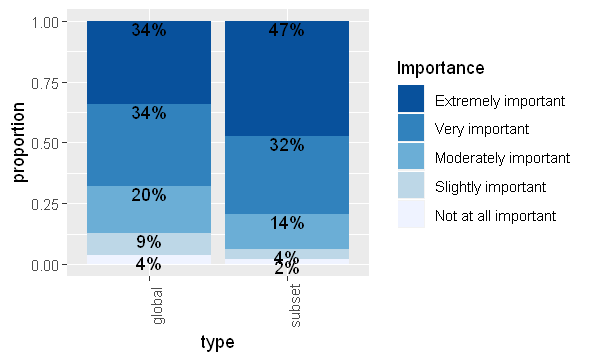

In [20]:
options(repr.plot.width=5, repr.plot.height=3)

columnOrder=c("Extremely important", "Very important", "Moderately important", "Slightly important", "Not at all important")

q3_2_1_graph <- rbind(summariseCol("subsetdf", "q3_2_1", "subset"), summariseCol("globaldf", "q3_2_1", "global"))
q3_2_1_xlsx <-merge(summariseCol("globaldf", "q3_2_1", "global")[ , c("q", "proportion")], 
                    summariseCol("subsetdf", "q3_2_1", "subset")[ , c("q", "proportion")], by="q")
q3_2_1_xlsx<-rename(q3_2_1_xlsx, "q3_2_1"="q", 'All'="proportion.x", "SDG"="proportion.y")

ggplot(q3_2_1_graph, aes(fill=factor(q, level=columnOrder), y=proportion, x=type)) + 
    geom_bar(position="fill", stat="identity")+ theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_brewer(palette="Blues", direction = -1)+
     geom_text(aes(label=percent(proportion, accuracy=1)), vjust = 1, position="Stack")+
    labs(fill = "Importance")


<a id='q5_7'></a>
### Q5.7 To what extent do you agree or disagree with the following: “The funding of research should be more strongly linked to demonstrable societal impact”
<a href='#contents'>Return to Contents</a><br/>

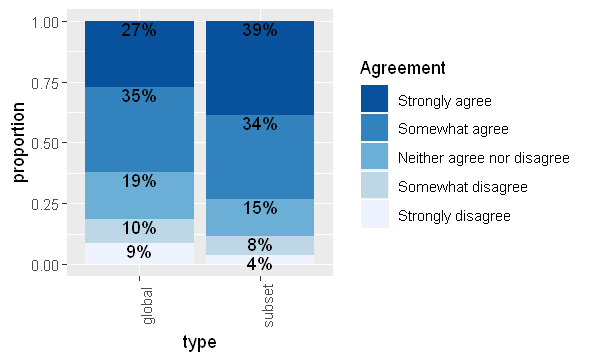

In [21]:
options(repr.plot.width=5, repr.plot.height=3)

columnOrder=c("Strongly agree", "Somewhat agree", "Neither agree nor disagree", "Somewhat disagree", "Strongly disagree")

q5_7_graph<- rbind(summariseCol("subsetdf", "q5_7", "subset"), summariseCol("globaldf", "q5_7", "global"))
q5_7_xlsx <-merge(summariseCol("globaldf", "q5_7", "global")[ , c("q", "proportion")], 
                    summariseCol("subsetdf", "q5_7", "subset")[ , c("q", "proportion")], by="q")
q5_7_xlsx<-rename(q5_7_xlsx, "q5_7"="q", 'All'="proportion.x", "SDG"="proportion.y")

ggplot(q5_7_graph, aes(fill=factor(q, level=columnOrder), y=proportion, x=type)) + 
    geom_bar(position="fill", stat="identity")+ theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_brewer(palette="Blues", direction = -1)+
     geom_text(aes(label=percent(proportion, accuracy=1)), vjust = 1, position="Stack") +
   labs(fill = "Agreement")


<a id='q4_3'></a>
### Q4.3 For your most recent publication, which of the following did you do before carrying out the research?
<a href='#contents'>Return to Contents</a><br/>

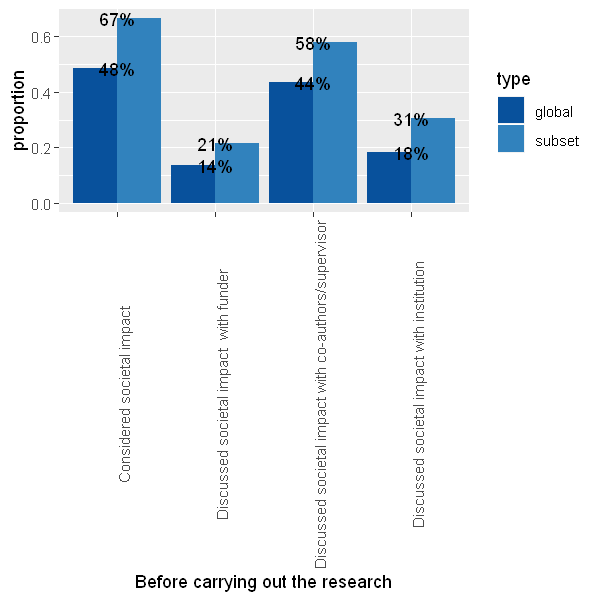

In [22]:
options(repr.plot.width=5, repr.plot.height=5)

numRows=sum(!is.na(globaldf$q4_4))
summary<-data.frame(t(c("Considered societal impact", sum(!is.na(globaldf$q4_3_1)), sum(!is.na(globaldf$q4_3_1))/numRows, "global")))
summary<-rbind(summary, data.frame(t(c("Discussed societal impact with co-authors/supervisor", sum(!is.na(globaldf$q4_3_4)), sum(!is.na(globaldf$q4_3_4))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("Discussed societal impact with institution", sum(!is.na(globaldf$q4_3_5)), sum(!is.na(globaldf$q4_3_5))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("Discussed societal impact  with funder", sum(!is.na(globaldf$q4_3_6)), sum(!is.na(globaldf$q4_3_6))/numRows, "global"))))
numRows=sum(!is.na(subsetdf$q4_4))
summary<-rbind(summary, data.frame(t(c("Considered societal impact", sum(!is.na(subsetdf$q4_3_1)), sum(!is.na(subsetdf$q4_3_1))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Discussed societal impact with co-authors/supervisor", sum(!is.na(subsetdf$q4_3_4)), sum(!is.na(subsetdf$q4_3_4))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Discussed societal impact with institution", sum(!is.na(subsetdf$q4_3_5)), sum(!is.na(subsetdf$q4_3_5))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Discussed societal impact  with funder", sum(!is.na(subsetdf$q4_3_6)), sum(!is.na(subsetdf$q4_3_6))/numRows, "subset"))))
summary <-setNames(summary, c("q", "count", "proportion", "type"))
summary$proportion<-as.numeric(as.character(summary$proportion))

q4_3_xlsx <-merge(summary[summary$type=="subset", c("q", "proportion")],
                  summary[summary$type=="global", c("q", "proportion")], by="q")
q4_3_xlsx<-rename(q4_3_xlsx, "q4_3"="q", "SDG"="proportion.x", 'All'="proportion.y")

ggplot(summary, aes(fill=type, y=proportion, x=q)) + 
    geom_bar(position="dodge", stat="identity")+ theme(axis.text.x = element_text(angle = 90))+
    scale_fill_manual(values = c("#08519c", "#3182bd"))+
    geom_text(aes(label=percent(proportion, accuracy=1)))+
    labs(x="Before carrying out the research")

## Audience

<a id='q3_6'></a>
### Q3.6 Which of the following types of impact do you hope that your most recent publication will have?
<a href='#contents'>Return to Contents</a><br/>

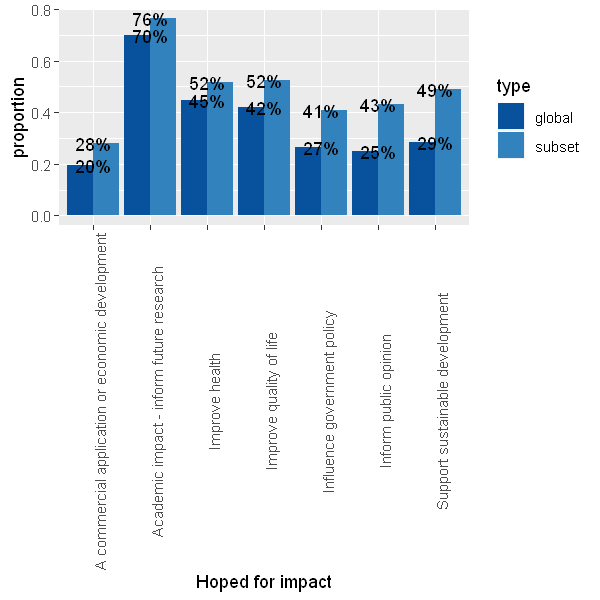

In [23]:
options(repr.plot.width=5, repr.plot.height=5)

numRows=table(!is.na(globaldf$q3_6_1)|!is.na(globaldf$q3_6_4)| !is.na(globaldf$q3_6_5)| !is.na(globaldf$q3_6_6)|
              !is.na(globaldf$q3_6_7)|!is.na(globaldf$q3_6_8)|!is.na(globaldf$q3_6_9)|!is.na(globaldf$q3_6_10)|
              !is.na(globaldf$q3_6_10_text))[2]

summary<-data.frame(t(c("Academic impact - inform future research", sum(!is.na(globaldf$q3_6_9)), sum(!is.na(globaldf$q3_6_9))/numRows, "global")))
summary<-rbind(summary, data.frame(t(c("Inform public opinion", sum(!is.na(globaldf$q3_6_1)), sum(!is.na(globaldf$q3_6_1))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("Improve quality of life", sum(!is.na(globaldf$q3_6_4)), sum(!is.na(globaldf$q3_6_4))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("Improve health", sum(!is.na(globaldf$q3_6_5)), sum(!is.na(globaldf$q3_6_5))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("Support sustainable development", sum(!is.na(globaldf$q3_6_6)), sum(!is.na(globaldf$q3_6_6))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("A commercial application or economic development", sum(!is.na(globaldf$q3_6_7)), sum(!is.na(globaldf$q3_6_7))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("Influence government policy", sum(!is.na(globaldf$q3_6_8)), sum(!is.na(globaldf$q3_6_8))/numRows, "global"))))

numRows=table(!is.na(subsetdf$q3_6_1)|!is.na(subsetdf$q3_6_4)| !is.na(subsetdf$q3_6_5)| !is.na(subsetdf$q3_6_6)|
              !is.na(subsetdf$q3_6_7)|!is.na(subsetdf$q3_6_8)|!is.na(subsetdf$q3_6_9)|!is.na(subsetdf$q3_6_10)|
              !is.na(subsetdf$q3_6_10_text))[2]
summary<-rbind(summary,data.frame(t(c("Academic impact - inform future research", sum(!is.na(subsetdf$q3_6_9)), sum(!is.na(subsetdf$q3_6_9))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Inform public opinion", sum(!is.na(subsetdf$q3_6_1)), sum(!is.na(subsetdf$q3_6_1))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Improve quality of life", sum(!is.na(subsetdf$q3_6_4)), sum(!is.na(subsetdf$q3_6_4))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Improve health", sum(!is.na(subsetdf$q3_6_5)), sum(!is.na(subsetdf$q3_6_5))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Support sustainable development", sum(!is.na(subsetdf$q3_6_6)), sum(!is.na(subsetdf$q3_6_6))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("A commercial application or economic development", sum(!is.na(subsetdf$q3_6_7)), sum(!is.na(subsetdf$q3_6_7))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Influence government policy", sum(!is.na(subsetdf$q3_6_8)), sum(!is.na(subsetdf$q3_6_8))/numRows, "subset"))))

summary <-setNames(summary, c("q", "count", "proportion", "type"))
summary$proportion<-as.numeric(as.character(summary$proportion))

q3_6_xlsx <-merge(summary[summary$type=="subset", c("q", "proportion")],
                  summary[summary$type=="global", c("q", "proportion")], by="q")
q3_6_xlsx<-rename(q3_6_xlsx, "q3_6"="q", "SDG"="proportion.x", 'All'="proportion.y")

ggplot(summary, aes(fill=type, y=proportion, x=q)) + 
    geom_bar(position="dodge", stat="identity")+ theme(axis.text.x = element_text(angle = 90))+
    scale_fill_manual(values = c("#08519c", "#3182bd"))+
    geom_text(aes(label=percent(proportion, accuracy=1)))+
    labs(x="Hoped for impact")


<a id='q3_7'></a>
### Q3.7 Which of the following audiences were you trying to reach with your most recent publication?
<a href='#contents'>Return to Contents</a><br/>

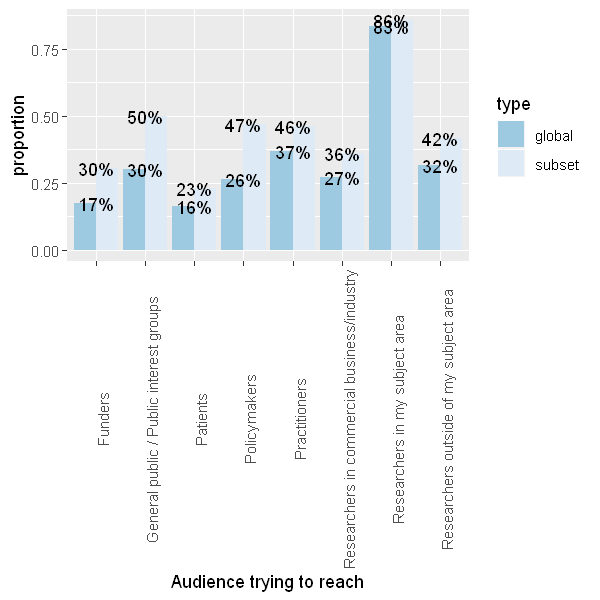

In [24]:
options(repr.plot.width=5, repr.plot.height=5)

numRows=table(!is.na(globaldf$q3_7_1)|!is.na(globaldf$q3_7_4)| !is.na(globaldf$q3_7_5)| !is.na(globaldf$q3_7_6)|
              !is.na(globaldf$q3_7_11)|!is.na(globaldf$q3_7_7)|!is.na(globaldf$q3_7_8)|!is.na(globaldf$q3_7_9)|
              !is.na(globaldf$q3_7_10)|!is.na(globaldf$q3_7_12)| !is.na(globaldf$q3_7_11_text))[2]

summary<-data.frame(t(c("Researchers in my subject area", sum(!is.na(globaldf$q3_7_1)), sum(!is.na(globaldf$q3_7_1))/numRows, "global")))
summary<-rbind(summary, data.frame(t(c("Researchers outside of my subject area", sum(!is.na(globaldf$q3_7_4)), sum(!is.na(globaldf$q3_7_4))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("Researchers in commercial business/industry", sum(!is.na(globaldf$q3_7_5)), sum(!is.na(globaldf$q3_7_5))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("General public / Public interest groups", sum(!is.na(globaldf$q3_7_6)), sum(!is.na(globaldf$q3_7_6))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("Patients", sum(!is.na(globaldf$q3_7_7)), sum(!is.na(globaldf$q3_7_7))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("Funders", sum(!is.na(globaldf$q3_7_8)), sum(!is.na(globaldf$q3_7_8))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("Practitioners", sum(!is.na(globaldf$q3_7_9)), sum(!is.na(globaldf$q3_7_9))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("Policymakers", sum(!is.na(globaldf$q3_7_10)), sum(!is.na(globaldf$q3_7_10))/numRows, "global"))))

numRows=table(!is.na(subsetdf$q3_7_1)|!is.na(subsetdf$q3_7_4)| !is.na(subsetdf$q3_7_5)| !is.na(subsetdf$q3_7_6)|
              !is.na(subsetdf$q3_7_11)|!is.na(subsetdf$q3_7_7)|!is.na(subsetdf$q3_7_8)|!is.na(subsetdf$q3_7_9)|
              !is.na(subsetdf$q3_7_10)|!is.na(subsetdf$q3_7_12)| !is.na(subsetdf$q3_7_11_text))[2]

summary<-rbind(summary, data.frame(t(c("Researchers in my subject area", sum(!is.na(subsetdf$q3_7_1)), sum(!is.na(subsetdf$q3_7_1))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Researchers outside of my subject area", sum(!is.na(subsetdf$q3_7_4)), sum(!is.na(subsetdf$q3_7_4))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Researchers in commercial business/industry", sum(!is.na(subsetdf$q3_7_5)), sum(!is.na(subsetdf$q3_7_5))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("General public / Public interest groups", sum(!is.na(subsetdf$q3_7_6)), sum(!is.na(subsetdf$q3_7_6))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Patients", sum(!is.na(subsetdf$q3_7_7)), sum(!is.na(subsetdf$q3_7_7))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Funders", sum(!is.na(subsetdf$q3_7_8)), sum(!is.na(subsetdf$q3_7_8))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Practitioners", sum(!is.na(subsetdf$q3_7_9)), sum(!is.na(subsetdf$q3_7_9))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Policymakers", sum(!is.na(subsetdf$q3_7_10)), sum(!is.na(subsetdf$q3_7_10))/numRows, "subset"))))

summary <-setNames(summary, c("q", "count", "proportion", "type"))
summary$proportion<-as.numeric(as.character(summary$proportion))
q3_7_xlsx<-merge(summary[summary$type=="subset", c("q", "proportion")],
                  summary[summary$type=="global", c("q", "proportion")], by="q")
q3_7_xlsx<-rename(q3_7_xlsx, "q3_7"="q", "SDG"="proportion.x", 'All'="proportion.y")

ggplot(summary, aes(fill=type, y=proportion, x=q)) + 
    geom_bar(position="dodge", stat="identity")+ theme(axis.text.x = element_text(angle = 90))+
    scale_fill_brewer(palette="Blues", direction = -1)+
    geom_text(aes(label=percent(proportion, accuracy=1)))+
    labs(x="Audience trying to reach")


## Channels of Communication

<a id='q3_4'></a>
### Q3.4 To what extent was your choice of journal influenced by your intended societal impact for the research?
<a href='#contents'>Return to Contents</a><br/>

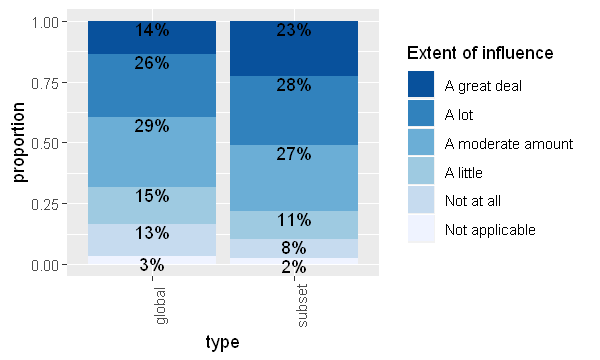

In [25]:
options(repr.plot.width=5, repr.plot.height=3)

columnOrder=c("A great deal", "A lot", "A moderate amount", "A little", "Not at all", "Not applicable")

q3_4_graph <- rbind(summariseCol("subsetdf", "q3_4", "subset"), summariseCol("globaldf", "q3_4", "global"))

q3_4_xlsx <-merge(q3_4_graph[q3_4_graph$type=="global", c("q", "proportion")],
                  q3_4_graph[q3_4_graph$type=="subset", c("q", "proportion")], by="q")
q3_4_xlsx<-rename(q3_4_xlsx, "q3_4"="q", 'All'="proportion.x", "SDG"="proportion.y")

ggplot(q3_4_graph, aes(fill=factor(q, level=columnOrder), y=proportion, x=type)) + 
    geom_bar(position="fill", stat="identity")+ theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_brewer(palette="Blues", direction = -1)+
     geom_text(aes(label=percent(proportion, accuracy=1)), vjust = 1, position="Stack")+
    labs(fill="Extent of influence")


<a id='q3_5'></a>
### Q3.5 What aspects of this journal did you think made it appropriate to the potential societal impact of your research?
<a href='#contents'>Return to Contents</a><br/>


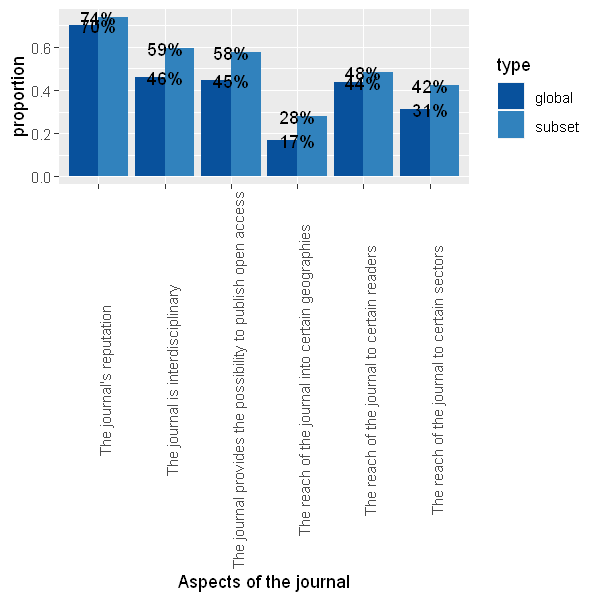

In [26]:

options(repr.plot.width=5, repr.plot.height=5)

numRows=table(!is.na(subsetdf$q3_5_1)|!is.na(subsetdf$q3_5_2)| !is.na(subsetdf$q3_5_3)| !is.na(subsetdf$q3_5_5)|
              !is.na(subsetdf$q3_5_6)|!is.na(subsetdf$q3_5_7)|!is.na(subsetdf$q3_5_4)|!is.na(subsetdf$q3_5_8)|
              !is.na(subsetdf$q3_5_4_text))[2]

summary<-data.frame(t(c("The journal provides the possibility to publish open access", sum(!is.na(subsetdf$q3_5_1)), sum(!is.na(subsetdf$q3_5_1))/numRows, "subset")))
summary<-rbind(summary, data.frame(t(c("The journal's reputation", sum(!is.na(subsetdf$q3_5_2)), sum(!is.na(subsetdf$q3_5_2))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("The reach of the journal to certain sectors", sum(!is.na(subsetdf$q3_5_3)), sum(!is.na(subsetdf$q3_5_3))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("The reach of the journal to certain readers", sum(!is.na(subsetdf$q3_5_5)), sum(!is.na(subsetdf$q3_5_5))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("The reach of the journal into certain geographies", sum(!is.na(subsetdf$q3_5_6)), sum(!is.na(subsetdf$q3_5_6))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("The journal is interdisciplinary", sum(!is.na(subsetdf$q3_5_7)), sum(!is.na(subsetdf$q3_5_7))/numRows, "subset"))))

numRows=table(!is.na(globaldf$q3_5_1)|!is.na(globaldf$q3_5_2)| !is.na(globaldf$q3_5_3)| !is.na(globaldf$q3_5_5)|
              !is.na(globaldf$q3_5_6)|!is.na(globaldf$q3_5_7)|!is.na(globaldf$q3_5_4)|!is.na(globaldf$q3_5_8)|
              !is.na(globaldf$q3_5_4_text))[2]

summary<-rbind(summary, data.frame(t(c("The journal provides the possibility to publish open access", sum(!is.na(globaldf$q3_5_1)), sum(!is.na(globaldf$q3_5_1))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("The journal's reputation", sum(!is.na(globaldf$q3_5_2)), sum(!is.na(globaldf$q3_5_2))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("The reach of the journal to certain sectors", sum(!is.na(globaldf$q3_5_3)), sum(!is.na(globaldf$q3_5_3))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("The reach of the journal to certain readers", sum(!is.na(globaldf$q3_5_5)), sum(!is.na(globaldf$q3_5_5))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("The reach of the journal into certain geographies", sum(!is.na(globaldf$q3_5_6)), sum(!is.na(globaldf$q3_5_6))/numRows, "global"))))
summary<-rbind(summary, data.frame(t(c("The journal is interdisciplinary", sum(!is.na(globaldf$q3_5_7)), sum(!is.na(globaldf$q3_5_7))/numRows, "global"))))
summary <-setNames(summary, c("q3_5", "count", "proportion", "type"))
summary$proportion<-as.numeric(as.character(summary$proportion))

q3_5_xlsx <-merge(summary[summary$type=="subset", c("q3_5", "proportion")],
                  summary[summary$type=="global", c("q3_5", "proportion")], by="q3_5")
q3_5_xlsx<-rename(q3_5_xlsx, "SDG"="proportion.x", 'All'="proportion.y")

ggplot(summary, aes(fill=type, y=proportion, x=q3_5)) + 
    geom_bar(position="dodge", stat="identity")+ theme(axis.text.x = element_text(angle = 90))+
    scale_fill_manual(values = c("#08519c", "#3182bd"))+
    geom_text(aes(label=percent(proportion, accuracy=1)))+
    labs(x="Aspects of the journal")


<a id='q4_1'></a>
### Q4.1 For your most recent publication, which of the following have you done (or do you plan to do) to increase the societal impact of the research - as opposed to increasing awareness with your peers?
### Q4.2 Of these activities, which one do you believe is likely to have the greatest effect on increasing the societal impact of the research?
<a href='#contents'>Return to Contents</a><br/>


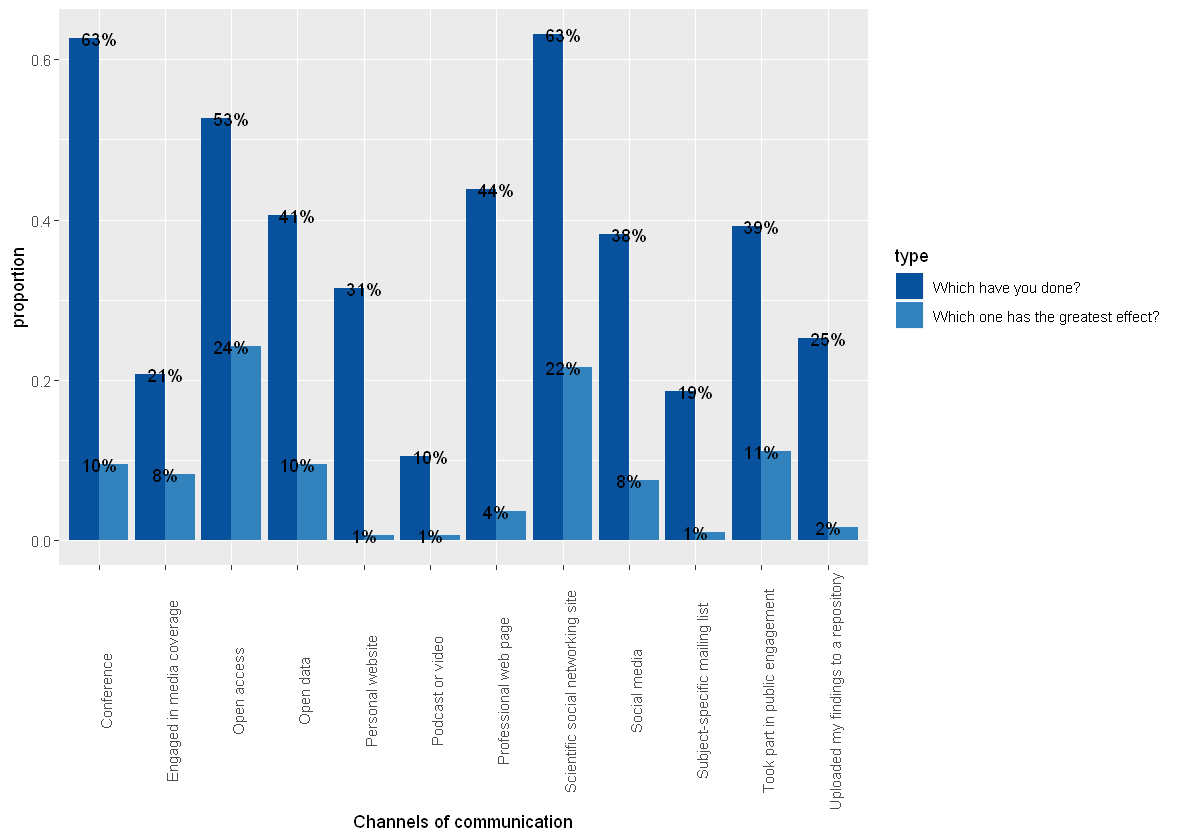

In [27]:
options(stringsAsFactors=FALSE)
options(repr.plot.width=10, repr.plot.height=7)
#Q4.1 ...which of the following have you done 
numRows=table(!is.na(subsetdf$q4_1_1)|!is.na(subsetdf$q4_1_4)| !is.na(subsetdf$q4_1_5)| !is.na(subsetdf$q4_1_6)|
              !is.na(subsetdf$q4_1_7)|!is.na(subsetdf$q4_1_8)|!is.na(subsetdf$q4_1_13)|!is.na(subsetdf$q4_1_15)|
              !is.na(subsetdf$q4_1_16)|!is.na(subsetdf$q4_1_9)|!is.na(subsetdf$q4_1_10)|!is.na(subsetdf$q4_1_11)|
              !is.na(subsetdf$q4_1_12)|!is.na(subsetdf$q4_1_14)|!is.na(subsetdf$q4_1_13_text))[2]

summary<-data.frame(t(c("Presented at a conference", sum(!is.na(subsetdf$q4_1_1)), sum(!is.na(subsetdf$q4_1_1))/numRows, "Which have you done?")))
summary<-rbind(summary, data.frame(t(c("Promoted the research on a professional page (e.g. university profile page)", sum(!is.na(subsetdf$q4_1_4)), sum(!is.na(subsetdf$q4_1_4))/numRows, "Which have you done?"))))
summary<-rbind(summary, data.frame(t(c("Promoted the research on a scientific social networking site (e.g. ResearchGate, Academia, Mendeley)", sum(!is.na(subsetdf$q4_1_5)), sum(!is.na(subsetdf$q4_1_5))/numRows, "Which have you done?"))))
summary<-rbind(summary, data.frame(t(c("Promoted the research on social media", sum(!is.na(subsetdf$q4_1_6)), sum(!is.na(subsetdf$q4_1_6))/numRows, "Which have you done?"))))
summary<-rbind(summary, data.frame(t(c("Uploaded findings to a repository", sum(!is.na(subsetdf$q4_1_7)), sum(!is.na(subsetdf$q4_1_7))/numRows, "Which have you done?"))))
summary<-rbind(summary, data.frame(t(c("Promoted the research on a personal website, including blogs", sum(!is.na(subsetdf$q4_1_8)), sum(!is.na(subsetdf$q4_1_8))/numRows, "Which have you done?"))))
summary<-rbind(summary, data.frame(t(c("Made my research data openly accessible", sum(!is.na(subsetdf$q4_1_15)), sum(!is.na(subsetdf$q4_1_15))/numRows, "Which have you done?"))))
summary<-rbind(summary, data.frame(t(c("Published the paper open access", sum(!is.na(subsetdf$q4_1_16)), sum(!is.na(subsetdf$q4_1_16))/numRows, "Which have you done?"))))
summary<-rbind(summary, data.frame(t(c("Took part in public engagement activities on my research", sum(!is.na(subsetdf$q4_1_9)), sum(!is.na(subsetdf$q4_1_9))/numRows, "Which have you done?"))))
summary<-rbind(summary, data.frame(t(c("Engaged in media coverage", sum(!is.na(subsetdf$q4_1_10)), sum(!is.na(subsetdf$q4_1_10))/numRows, "Which have you done?"))))
summary<-rbind(summary, data.frame(t(c("Emailed a subject-specific mailing list", sum(!is.na(subsetdf$q4_1_11)), sum(!is.na(subsetdf$q4_1_11))/numRows, "Which have you done?"))))
summary<-rbind(summary, data.frame(t(c("Promoted the research via a podcast or video", sum(!is.na(subsetdf$q4_1_12)), sum(!is.na(subsetdf$q4_1_12))/numRows, "Which have you done?"))))
summary <-setNames(summary, c("q", "count", "proportion", "type"))

#Q4.2 ...which one...the greatest effect on increasing the societal impact 
numRows<- sum(!is.na(subsetdf$q4_2))

#numRows<-table(!is.na(subsetdf$q4_2)|!is.na(subsetdf$q48))[2]
channels <- c("Presented at a conference",
              "Promoted the research on a professional page (e.g. university profile page)", 
              "Promoted the research on a scientific social networking site (e.g. ResearchGate, Academia, Mendeley)",
              "Promoted the research on social media",
              "Uploaded my findings to a repository",
              "Promoted the research on a personal website, including blogs",
              "Made my research data openly accessible",
              "Published the paper open access",
              "Took part in public engagement activities on my research", 
              "Engaged in media coverage", 
              "Emailed a subject-specific mailing list",
              "Promoted the research via a podcast or video")

for (channel in channels){
    channelDF<-data.frame(t(c(channel, NROW(na.omit(subsetdf$q4_2[subsetdf$q4_2==channel])),
                   NROW(na.omit(subsetdf$q4_2[subsetdf$q4_2==channel]))/numRows, "Which one has the greatest effect?")))
    channelDF<-setNames(channelDF, c("q", "count", "proportion", "type"))
    summary<-rbind(summary, channelDF)
}
                   
              
summary$q[summary$q == "Presented at a conference"] <- "Conference"
summary$q[summary$q == "Promoted the research on a professional page (e.g. university profile page)"] <- "Professional web page"
summary$q[summary$q == "Promoted the research on a scientific social networking site (e.g. ResearchGate, Academia, Mendeley)"] <- "Scientific social networking site"
summary$q[summary$q == "Promoted the research on social media"] <- "Social media"
summary$q[summary$q == "Uploaded findings to a repository"] <- "Uploaded my findings to a repository"
summary$q[summary$q == "Promoted the research on a personal website, including blogs"] <- "Personal website"
summary$q[summary$q == "Made my research data openly accessible"] <- "Open data"
summary$q[summary$q == "Published the paper open access"] <- "Open access"
summary$q[summary$q == "Took part in public engagement activities on my research"] <- "Took part in public engagement"
summary$q[summary$q == "Engaged in media coverage"] <- "Engaged in media coverage"
summary$q[summary$q == "Emailed a subject-specific mailing list"] <- "Subject-specific mailing list"
summary$q[summary$q == "Promoted the research via a podcast or video"] <- "Podcast or video"
summary<-summary[summary$q != "Other (please specify)",]
summary$proportion<-as.numeric(as.character(summary$proportion))

q4_1_xlsx <-merge(summary[summary$type=="Which have you done?", c("q", "proportion")],
                  summary[summary$type=="Which one has the greatest effect?", c("q", "proportion")], by="q")
q4_1_xlsx<-rename(q4_1_xlsx, "q4_1"="q", "channelsDone"="proportion.x", 'greatestChannel'="proportion.y")

ggplot(summary, aes(fill=type, y=proportion, x=q)) + 
    geom_bar(position="dodge", stat="identity")+ theme(axis.text.x = element_text(angle = 90))+
    scale_fill_manual(values = c("#08519c", "#3182bd"))+
    geom_text(aes(label=percent(proportion, accuracy=1)))+
    labs(x="Channels of communication")



## Measuring Impact

<a id='q5_1'></a>
### Q5.1 To what extent do you attempt to track the societal impact of your published research?
<a href='#contents'>Return to Contents</a><br/>

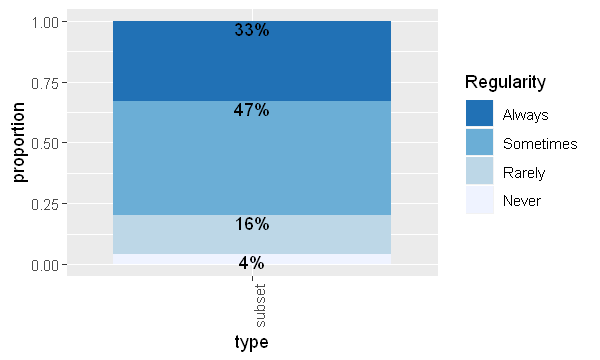

In [28]:
options(repr.plot.width=5, repr.plot.height=3)

columnOrder=c("Always", "Sometimes", "Rarely", "Never")

q5_1_graph <-summariseCol("subsetdf", "q5_1", "subset")
q5_1_xlsx <-q5_1_graph[, c("q", "proportion")]
q5_1_xlsx<-rename(q5_1_xlsx, "q5_1"="q", "SDG"="proportion")

ggplot(q5_1_graph, aes(fill=factor(q, level=columnOrder), y=proportion, x=type)) + 
    geom_bar(position="fill", stat="identity")+ theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_brewer(palette="Blues", direction = -1)+
     geom_text(aes(label=percent(proportion, accuracy=1)), vjust = 1, position="Stack")+
    labs(fill="Regularity")


<a id='q5_4'></a>
### Q5.4 To what extent do you agree or disagree with the following: “Measuring the societal impact of my research is something I feel I should do more of”
<a href='#contents'>Return to Contents</a><br/>

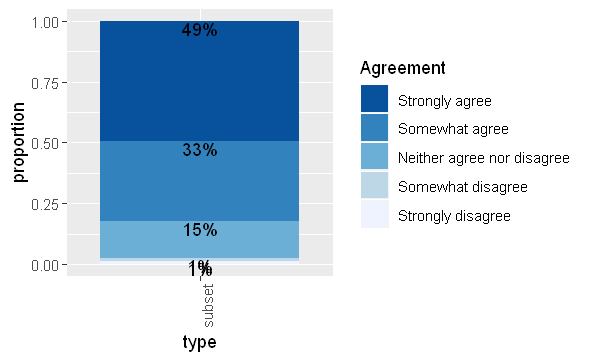

In [29]:
options(repr.plot.width=5, repr.plot.height=3)

columnOrder=c("Strongly agree", "Somewhat agree", "Neither agree nor disagree", "Somewhat disagree", "Strongly disagree")

q5_4_graph<-summariseCol("subsetdf", "q5_4", "subset")
q5_4_xlsx<-q5_4_graph[, c("q", "proportion")]
q5_4_xlsx<-rename(q5_4_xlsx, "q5_4"="q", "SDG"="proportion")

ggplot(q5_4_graph, aes(fill=factor(q, level=columnOrder), y=proportion, x=type)) + 
    geom_bar(position="fill", stat="identity")+ theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_brewer(palette="Blues", direction = -1)+
     geom_text(aes(label=percent(proportion, accuracy=1)), vjust = 1, position="Stack")+
    labs(fill="Agreement")


<a id='q48'></a>
### Q49 Which one method do you think is the best for tracking the societal impact of your research?
<a href='#contents'>Return to Contents</a><br/>

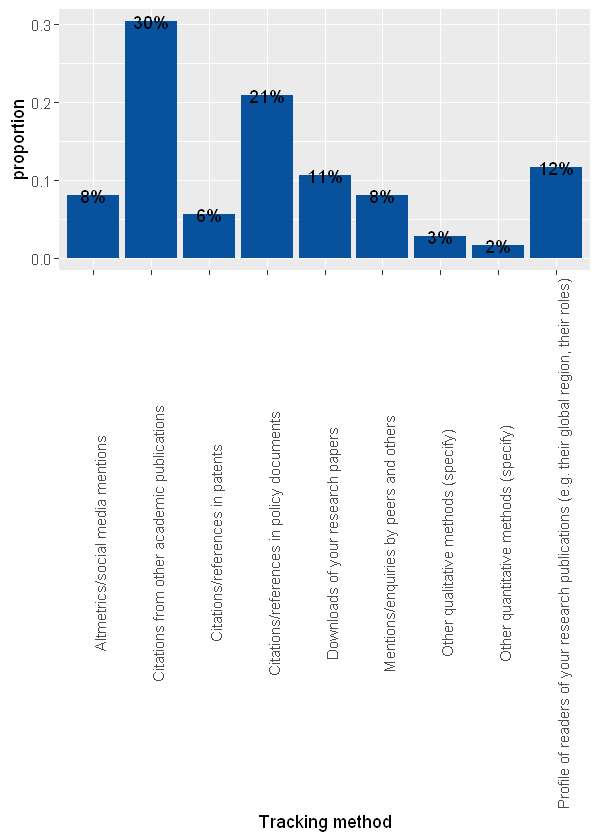

In [30]:
options(repr.plot.width=5, repr.plot.height=7)

columnOrder=c("Strongly agree", "Somewhat agree", "Neither agree nor disagree", "Somewhat disagree", "Strongly disagree")

q49_graph<-summariseCol("subsetdf", "q49", "subset")
q49_xlsx<-q49_graph[, c("q", "proportion")]
q49_xlsx<-rename(q49_xlsx, "q49"="q", "SDG"="proportion")

ggplot(q49_graph, aes(fill=type, y=proportion, x=q)) + 
    geom_bar(position="dodge", stat="identity", fill = "#08519c")+ theme(axis.text.x = element_text(angle = 90))+
    geom_text(aes(label=percent(proportion, accuracy=1)))+
    labs(x="Tracking method")


<a id='q5_5'></a>
### Q5.5 What are the challenges with regards to tracking the societal impact of your research?
<a href='#contents'>Return to Contents</a><br/>

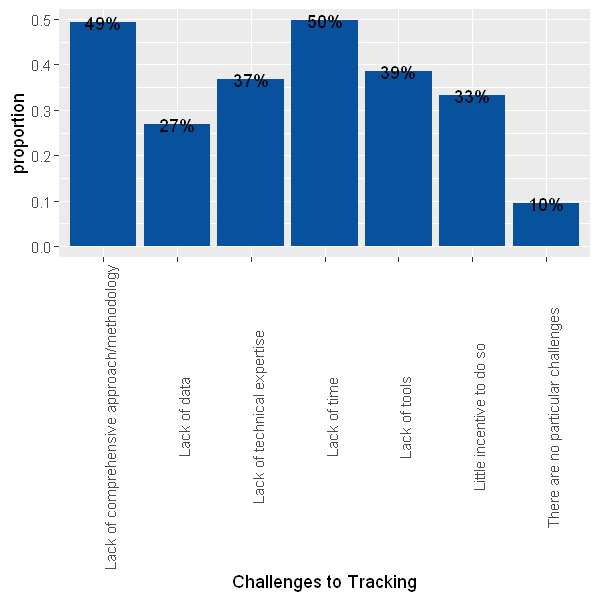

In [31]:
options(repr.plot.width=5, repr.plot.height=5)
numRows=table(!is.na(subsetdf$q5_5_1)|!is.na(subsetdf$q5_5_4)| !is.na(subsetdf$q5_5_11)| !is.na(subsetdf$q5_5_5)|
              !is.na(subsetdf$q5_5_6)|!is.na(subsetdf$q5_5_7)|!is.na(subsetdf$q5_5_8)|!is.na(subsetdf$q5_5_9)|
              !is.na(subsetdf$q5_5_10)|!is.na(subsetdf$q5_5_10_text))[2]

summary<-data.frame(t(c("There are no particular challenges", sum(!is.na(subsetdf$q5_5_1)), sum(!is.na(subsetdf$q5_5_1))/numRows, "subset")))
summary<-rbind(summary, data.frame(t(c("Little incentive to do so", sum(!is.na(subsetdf$q5_5_4)), sum(!is.na(subsetdf$q5_5_4))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Lack of comprehensive approach/methodology", sum(!is.na(subsetdf$q5_5_11)), sum(!is.na(subsetdf$q5_5_11))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Lack of technical expertise", sum(!is.na(subsetdf$q5_5_5)), sum(!is.na(subsetdf$q5_5_5))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Lack of data", sum(!is.na(subsetdf$q5_5_6)), sum(!is.na(subsetdf$q5_5_6))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Lack of time", sum(!is.na(subsetdf$q5_5_7)), sum(!is.na(subsetdf$q5_5_7))/numRows, "subset"))))
summary<-rbind(summary, data.frame(t(c("Lack of tools", sum(!is.na(subsetdf$q5_5_8)), sum(!is.na(subsetdf$q5_5_8))/numRows, "subset"))))

summary <-setNames(summary, c("q5_5", "count", "proportion", "type"))
summary$proportion<-as.numeric(as.character(summary$proportion))

q5_5_xlsx<-summary[, c("q5_5", "proportion")]
q5_5_xlsx<-rename(q5_5_xlsx, "SDG"="proportion")

ggplot(summary, aes(fill=type, y=proportion, x=q5_5)) + 
    geom_bar(position="dodge", stat="identity", fill = "#08519c")+ theme(axis.text.x = element_text(angle = 90))+
    geom_text(aes(label=percent(proportion, accuracy=1)))+
    labs(x="Challenges to Tracking")


# Associated SDGs 

In [32]:

print (NROW(subsetdf))
summary<-data.frame(t(c("No Poverty", sum(!is.na(subsetdf$q2_3_6)))))
summary<-rbind(summary, data.frame(t(c("Zero Hunger", sum(!is.na(subsetdf$q2_3_24))))))
summary<-rbind(summary, data.frame(t(c("Good Health and Well-Being", sum(!is.na(subsetdf$q2_3_25))))))
summary<-rbind(summary, data.frame(t(c("Quality Education", sum(!is.na(subsetdf$q2_3_26))))))
summary<-rbind(summary, data.frame(t(c("Gender Equality", sum(!is.na(subsetdf$q2_3_27))))))
summary<-rbind(summary, data.frame(t(c("Clean Water and Sanitation", sum(!is.na(subsetdf$q2_3_28))))))
summary<-rbind(summary, data.frame(t(c("Affordable and Clean Energy", sum(!is.na(subsetdf$q2_3_29))))))
summary<-rbind(summary, data.frame(t(c("Decent Work and Economic Growth", sum(!is.na(subsetdf$q2_3_30))))))
summary<-rbind(summary, data.frame(t(c("Industry, Innovation, and Infrastructure", sum(!is.na(subsetdf$q2_3_31))))))
summary<-rbind(summary, data.frame(t(c("Reduced Inequalities", sum(!is.na(subsetdf$q2_3_32))))))
summary<-rbind(summary, data.frame(t(c("Sustainable Cities and Communities", sum(!is.na(subsetdf$q2_3_33))))))
summary<-rbind(summary, data.frame(t(c("Responsible Consumption and Production", sum(!is.na(subsetdf$q2_3_34))))))
summary<-rbind(summary, data.frame(t(c("Climate Action", sum(!is.na(subsetdf$q2_3_35))))))
summary<-rbind(summary, data.frame(t(c("Life Below Water", sum(!is.na(subsetdf$q2_3_36))))))
summary<-rbind(summary, data.frame(t(c("Life on Land", sum(!is.na(subsetdf$q2_3_37))))))
summary<-rbind(summary, data.frame(t(c("Peace, Justice and Strong Institutions", sum(!is.na(subsetdf$q2_3_38))))))
summary<-rbind(summary, data.frame(t(c("Partnerships", sum(!is.na(subsetdf$q2_3_39))))))

summary$X2 <- as.numeric(as.character(summary$X2))
summary<-mutate(summary, proportion=X2/NROW(subsetdf))
summary <-setNames(summary, c("SDGs", "count", "proportion"))
print(summary[order(-summary$count),])
q2_3_xlsx<-summary





[1] 401
                                       SDGs count proportion
17                             Partnerships   401  1.0000000
3                Good Health and Well-Being   276  0.6882793
4                         Quality Education   248  0.6184539
9  Industry, Innovation, and Infrastructure   201  0.5012469
13                           Climate Action   176  0.4389027
10                     Reduced Inequalities   172  0.4289277
11       Sustainable Cities and Communities   171  0.4264339
16   Peace, Justice and Strong Institutions   164  0.4089776
5                           Gender Equality   162  0.4039900
8           Decent Work and Economic Growth   158  0.3940150
12   Responsible Consumption and Production   156  0.3890274
6                Clean Water and Sanitation   154  0.3840399
7               Affordable and Clean Energy   141  0.3516209
15                             Life on Land   136  0.3391521
2                               Zero Hunger   135  0.3366584
1               

<a id='export'></a>
### Export tables to Excel
<a href='#contents'>Return to Contents</a><br/>

In [33]:

wb<-createWorkbook("r-generated")
addWorksheet(wb, SDGname)

#Importance of Impact
names(q3_2_1_xlsx)[names(q3_2_1_xlsx) == "SDG"] <- paste (SDGname, "(n=", sum(!is.na(subsetdf$q3_2_1)), ")",sep="")
names(q3_2_1_xlsx)[names(q3_2_1_xlsx) == "All"] <- paste ("All", "(n=", sum(!is.na(globaldf$q3_2_1)), ")",sep="")
rowOrder=c("Extremely important", "Very important", "Moderately important", "Slightly important", "Not at all important")
writeDataTable(wb, SDGname, q3_2_1_xlsx[match(rowOrder, q3_2_1_xlsx$q3_2_1),], startRow=2, startCol=1, rowNames=FALSE)


names(q5_7_xlsx)[names(q5_7_xlsx) == "SDG"] <- paste (SDGname, "(n=", sum(!is.na(subsetdf$q5_7)), ")",sep="")
names(q5_7_xlsx)[names(q5_7_xlsx) == "All"] <- paste ("All", "(n=", sum(!is.na(globaldf$q5_7)), ")",sep="")
rowOrder=c("Strongly agree", "Somewhat agree", "Neither agree nor disagree", "Somewhat disagree", "Strongly disagree")
writeDataTable(wb, SDGname, q5_7_xlsx[match(rowOrder, q5_7_xlsx$q5_7),], startRow=12, startCol=1, rowNames=FALSE)

q4_3_xlsx<-q4_3_xlsx[order(q4_3_xlsx[,2], decreasing=TRUE),]
names(q4_3_xlsx)[names(q4_3_xlsx) == "SDG"] <- paste (SDGname, "(n=", sum(!is.na(subsetdf$q4_4)), ")",sep="")
names(q4_3_xlsx)[names(q4_3_xlsx) == "All"] <- paste ("All", "(n=", sum(!is.na(globaldf$q4_4)), ")",sep="")
writeDataTable(wb, SDGname, q4_3_xlsx, startRow=22, startCol=1, rowNames=FALSE)

#Audience
q3_6_xlsx<-q3_6_xlsx[order(q3_6_xlsx[,2], decreasing=TRUE),]
AllN=table(!is.na(globaldf$q3_6_1)|!is.na(globaldf$q3_6_4)| !is.na(globaldf$q3_6_5)| !is.na(globaldf$q3_6_6)|
              !is.na(globaldf$q3_6_7)|!is.na(globaldf$q3_6_8)|!is.na(globaldf$q3_6_9)|!is.na(globaldf$q3_6_10)|
              !is.na(globaldf$q3_6_10_text))[2]
SDGn=table(!is.na(subsetdf$q3_6_1)|!is.na(subsetdf$q3_6_4)| !is.na(subsetdf$q3_6_5)| !is.na(subsetdf$q3_6_6)|
              !is.na(subsetdf$q3_6_7)|!is.na(subsetdf$q3_6_8)|!is.na(subsetdf$q3_6_9)|!is.na(subsetdf$q3_6_10)|
              !is.na(subsetdf$q3_6_10_text))[2]
names(q3_6_xlsx)[names(q3_6_xlsx) == "SDG"] <- paste (SDGname, "(n=", SDGn, ")",sep="")
names(q3_6_xlsx)[names(q3_6_xlsx) == "All"] <- paste ("All", "(n=", AllN, ")",sep="")
writeDataTable(wb, SDGname, q3_6_xlsx, startRow=35, startCol=1, rowNames=FALSE)

AllN=table(!is.na(globaldf$q3_7_1)|!is.na(globaldf$q3_7_4)| !is.na(globaldf$q3_7_5)| !is.na(globaldf$q3_7_6)|
              !is.na(globaldf$q3_7_11)|!is.na(globaldf$q3_7_7)|!is.na(globaldf$q3_7_8)|!is.na(globaldf$q3_7_9)|
              !is.na(globaldf$q3_7_10)|!is.na(globaldf$q3_7_12)| !is.na(globaldf$q3_7_11_text))[2]
SDGn=table(!is.na(subsetdf$q3_7_1)|!is.na(subsetdf$q3_7_4)| !is.na(subsetdf$q3_7_5)| !is.na(subsetdf$q3_7_6)|
              !is.na(subsetdf$q3_7_11)|!is.na(subsetdf$q3_7_7)|!is.na(subsetdf$q3_7_8)|!is.na(subsetdf$q3_7_9)|
              !is.na(subsetdf$q3_7_10)|!is.na(subsetdf$q3_7_12)| !is.na(subsetdf$q3_7_11_text))[2]
names(q3_7_xlsx)[names(q3_7_xlsx) == "SDG"] <- paste (SDGname, "(n=", SDGn, ")",sep="")
names(q3_7_xlsx)[names(q3_7_xlsx) == "All"] <- paste ("All", "(n=", AllN, ")",sep="")
rowOrder=c("Researchers in my subject area", "Researchers outside of my subject area", "Researchers in commercial business/industry", "General public / Public interest groups",
           "Patients", "Funders", "Practitioners", "Policymakers")
writeDataTable(wb, SDGname, q3_7_xlsx[match(rowOrder, q3_7_xlsx$q3_7),], startRow=50, startCol=1, rowNames=FALSE)

#Channels of Communication
names(q3_4_xlsx)[names(q3_4_xlsx) == "SDG"] <- paste (SDGname, "(n=", sum(!is.na(subsetdf$q3_4)), ")",sep="")
names(q3_4_xlsx)[names(q3_4_xlsx) == "All"] <- paste ("All", "(n=", sum(!is.na(globaldf$q3_4)), ")",sep="")
rowOrder=c("A great deal", "A lot", "A moderate amount", "A little", "Not at all", "Not applicable")
writeDataTable(wb, SDGname, q3_4_xlsx[match(rowOrder, q3_4_xlsx$q3_4),], startRow=65, startCol=1, rowNames=FALSE)

q3_5_xlsx<-q3_5_xlsx[order(q3_5_xlsx[,2], decreasing=TRUE),]
SDGn=table(!is.na(subsetdf$q3_5_1)|!is.na(subsetdf$q3_5_2)| !is.na(subsetdf$q3_5_3)| !is.na(subsetdf$q3_5_5)|
              !is.na(subsetdf$q3_5_6)|!is.na(subsetdf$q3_5_7)|!is.na(subsetdf$q3_5_4)|!is.na(subsetdf$q3_5_8)|
              !is.na(subsetdf$q3_5_4_text))[2]
AllN=table(!is.na(globaldf$q3_5_1)|!is.na(globaldf$q3_5_2)| !is.na(globaldf$q3_5_3)| !is.na(globaldf$q3_5_5)|
              !is.na(globaldf$q3_5_6)|!is.na(globaldf$q3_5_7)|!is.na(globaldf$q3_5_4)|!is.na(globaldf$q3_5_8)|
              !is.na(globaldf$q3_5_4_text))[2]
names(q3_5_xlsx)[names(q3_5_xlsx) == "SDG"] <- paste (SDGname, "(n=", SDGn, ")",sep="")
names(q3_5_xlsx)[names(q3_5_xlsx) == "All"] <- paste ("All", "(n=", AllN, ")",sep="")
writeDataTable(wb, SDGname, q3_5_xlsx, startRow=80, startCol=1, rowNames=FALSE)

q4_1_xlsx<-q4_1_xlsx[order(q4_1_xlsx[,2], decreasing=TRUE),]
channelsN=table(!is.na(subsetdf$q4_1_1)|!is.na(subsetdf$q4_1_4)| !is.na(subsetdf$q4_1_5)| !is.na(subsetdf$q4_1_6)|
              !is.na(subsetdf$q4_1_7)|!is.na(subsetdf$q4_1_8)|!is.na(subsetdf$q4_1_13)|!is.na(subsetdf$q4_1_15)|
              !is.na(subsetdf$q4_1_16)|!is.na(subsetdf$q4_1_9)|!is.na(subsetdf$q4_1_10)|!is.na(subsetdf$q4_1_11)|
              !is.na(subsetdf$q4_1_12)|!is.na(subsetdf$q4_1_14)|!is.na(subsetdf$q4_1_13_text))[2]
names(q4_1_xlsx)[names(q4_1_xlsx) == "greatestChannel"] <- paste ("Which one has the greatest effect?", "(n=", sum(!is.na(subsetdf$q4_2)), ")",sep="")
names(q4_1_xlsx)[names(q4_1_xlsx) == "channelsDone"] <- paste ("Which have you done?", "(n=", channelsN, ")",sep="")
writeDataTable(wb, SDGname, q4_1_xlsx, startRow=95, startCol=1, rowNames=FALSE)

#Measuring Impact
names(q5_1_xlsx)[names(q5_1_xlsx) == "SDG"] <- paste (SDGname, "(n=", sum(!is.na(subsetdf$q5_1)), ")")
rowOrder=c("Always", "Sometimes", "Rarely", "Never")
writeDataTable(wb, SDGname, q5_1_xlsx[match(rowOrder, q5_1_xlsx$q5_1),], startRow=110, startCol=1, rowNames=FALSE)

names(q5_4_xlsx)[names(q5_4_xlsx) == "SDG"] <- paste (SDGname, "(n=", sum(!is.na(subsetdf$q5_4)), ")",sep="")
rowOrder=c("Strongly agree", "Somewhat agree", "Neither agree nor disagree", "Somewhat disagree", "Strongly disagree")
writeDataTable(wb, SDGname, q5_4_xlsx[match(rowOrder, q5_4_xlsx$q5_4),], startRow=125, startCol=1, rowNames=FALSE)

q49_xlsx<-q49_xlsx[order(q49_xlsx[,2], decreasing=TRUE),]
names(q49_xlsx)[names(q49_xlsx) == "SDG"] <- paste (SDGname, "(n=", sum(!is.na(subsetdf$q49)), ")",sep="")
writeDataTable(wb, SDGname, q49_xlsx, startRow=140, startCol=1, rowNames=FALSE)

q5_5_xlsx<-q5_5_xlsx[order(q5_5_xlsx[,2], decreasing=TRUE),]
SDGn=table(!is.na(subsetdf$q5_5_1)|!is.na(subsetdf$q5_5_4)| !is.na(subsetdf$q5_5_11)| !is.na(subsetdf$q5_5_5)|
              !is.na(subsetdf$q5_5_6)|!is.na(subsetdf$q5_5_7)|!is.na(subsetdf$q5_5_8)|!is.na(subsetdf$q5_5_9)|
              !is.na(subsetdf$q5_5_10)|!is.na(subsetdf$q5_5_10_text))[2]
names(q5_5_xlsx)[names(q5_5_xlsx) == "SDG"] <-  paste (SDGname, "(n=", SDGn, ")",sep="")
writeDataTable(wb, SDGname, q5_5_xlsx, startRow=155, startCol=1, rowNames=FALSE)


writeDataTable(wb, SDGname, q2_3_xlsx[order(-q2_3_xlsx$count),], startRow=175, startCol=1)
saveWorkbook(wb, "r-generated.xlsx", overwrite = TRUE)